In [2]:
!pip install scikit-bio
import nltk

^C


DEPRECATION: Loading egg at c:\users\parv\anaconda3\envs\pytorch_gpu\lib\site-packages\ont_bonito-0.8.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


  Using cached scikit-bio-0.6.3.tar.gz (5.4 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached natsort-8.4.0-py3-none-any.whl.metadata (21 kB)
  Using cached biom-format-2.1.16.tar.gz (11.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl.metadata (9.5 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached natsort-8.4.0-py3-non

In [3]:
from Bio import SeqIO
from seq_stat import align
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
#from aligned_clustering import conduct_align_clustering
from utils import get_original_strands, read_synthesized_strands_from_file, get_recovery_percentage, create_random_strand
import random
import uuid
import json

%load_ext autoreload
%autoreload 2

In [4]:

original_strands = get_original_strands(
    original_strand_filepath=r"C:\Users\Parv\Doc\RA\Projects\incomplete_cycles\data\0.8_badread\original_strands.txt",
    plain=True)

with open(r"C:\Users\Parv\Doc\RA\Projects\incomplete_cycles\data\0.8_badread\recoveries_455e44d8-7f89-4dc3-8ca7-499b2f0e33d6.json", 'r') as f:
    recoveries = json.load(f)

candidates = recoveries['candidates']

Let us fix it for a single strand - first aligned recovery - unique set of candidates please

In [5]:
protected_length = 20
original_strand = original_strands[0]

best_recovery = 0.0

best_recs_protected = []
best_recs_control = []
protected_recs = [[]]
random_recs = [[]]

for original_strand in tqdm(original_strands):
    start_indice = random.randint(0,170)
    random_strand = create_random_strand(strand_length=protected_length)
    best_recovery_protected = 0.0
    best_recovery_control = 0.0
    protected_recs_local = []
    random_recs_local = []
    for candidate in tqdm(candidates):
        
        aligned_strand, identity, indices = align(seqA=original_strand[start_indice:start_indice + protected_length], seqB=candidate)
        protected_recs_local.append(identity)

        if identity > best_recovery_protected:
            best_recovery_protected = identity

        aligned_strand, identity, indices = align(seqA=random_strand, seqB=candidate)
        random_recs_local.append(identity)

        if identity > best_recovery_control:
            best_recovery_control = identity

    print(f"Best recovery protected strand post alignment - {best_recovery_protected}")
    print(f"Best recovery control post alignment - {best_recovery_control}")
    best_recs_protected.append(best_recovery_protected)
    best_recs_control.append(best_recovery_control)
    protected_recs.append(protected_recs_local)
    random_recs.append(random_recs_local)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/26241 [00:00<?, ?it/s]

Best recovery protected strand post alignment - 1.0
Best recovery control post alignment - 0.782608695652174


  0%|          | 0/26241 [00:00<?, ?it/s]

Best recovery protected strand post alignment - 1.0
Best recovery control post alignment - 0.8260869565217391


  0%|          | 0/26241 [00:00<?, ?it/s]

Best recovery protected strand post alignment - 1.0
Best recovery control post alignment - 0.7037037037037037


  0%|          | 0/26241 [00:00<?, ?it/s]

Best recovery protected strand post alignment - 1.0
Best recovery control post alignment - 0.782608695652174


  0%|          | 0/26241 [00:00<?, ?it/s]

Best recovery protected strand post alignment - 1.0
Best recovery control post alignment - 0.8636363636363636


  0%|          | 0/26241 [00:00<?, ?it/s]

KeyboardInterrupt: 

Test for random collisions. First test how we do at recovering 20 bases at a time that are randomly alloted for each original strand. Repeat that a few times (just for the first five coupling rates). And then we think about random collisions. Maybe a part of the other strand, ah cause it will match a lot as well, so within the whole candidate pool, how would you know which is which?

(array([3.740e+02, 4.577e+03, 9.793e+03, 6.214e+03, 3.361e+03, 1.491e+03,
        3.200e+02, 8.600e+01, 2.000e+01, 5.000e+00]),
 array([0.2247191 , 0.28141386, 0.33810861, 0.39480337, 0.45149813,
        0.50819288, 0.56488764, 0.6215824 , 0.67827715, 0.73497191,
        0.79166667]),
 <BarContainer object of 10 artists>)

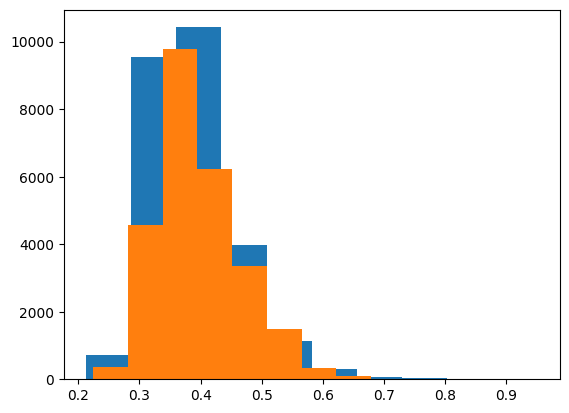

In [53]:
import matplotlib.pyplot as plt

plt.hist(protected_recs[1])
plt.hist(random_recs[1])

In [65]:
protected_recs_filtered = [i for i in protected_recs[1] if i > 0.70]
control_recs_filtered = [i for i in random_recs[1] if i > 0.70]

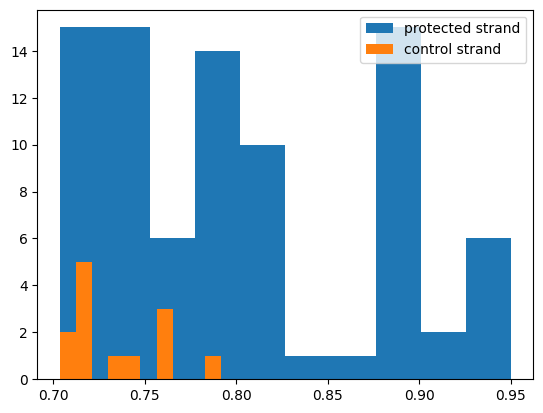

In [66]:
plt.hist(protected_recs_filtered, label="protected strand")
plt.hist(control_recs_filtered, label="control strand")
plt.legend()

In [68]:
# some metric here to compare to random strands - collision would not happen - we are actually seeing something useful
# Indicator that yes - here is this thing, frequency of candidates - need to understand usecase.
# Formalize and understand


In [69]:
# % of candidates over threshold value for protected strand vs control - and then the average recovery of 1.0

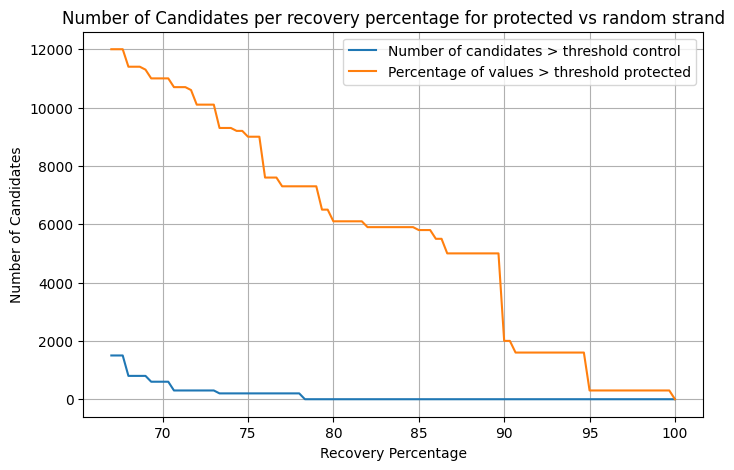

In [30]:
import numpy as np
import matplotlib.pyplot as plt


# Define thresholds
thresholds = np.linspace(67, np.max(protected_rec), 100)  # Create 100 threshold values from 0 to max

# Calculate the percentage of values above each threshold
percentages_control = [(np.sum(random_rec > t)) * 100 for t in thresholds]
percentages_protected = [(np.sum(protected_rec > t)) * 100 for t in thresholds]

# Plot the graph
plt.figure(figsize=(8, 5))
plt.plot(thresholds, percentages_control, label="Number of candidates > threshold control")
plt.plot(thresholds, percentages_protected, label="Percentage of values > threshold protected")
plt.xlabel("Recovery Percentage")
plt.ylabel("Number of Candidates")
plt.title("Number of Candidates per recovery percentage for protected vs random strand")
plt.grid()
plt.legend()
plt.show()

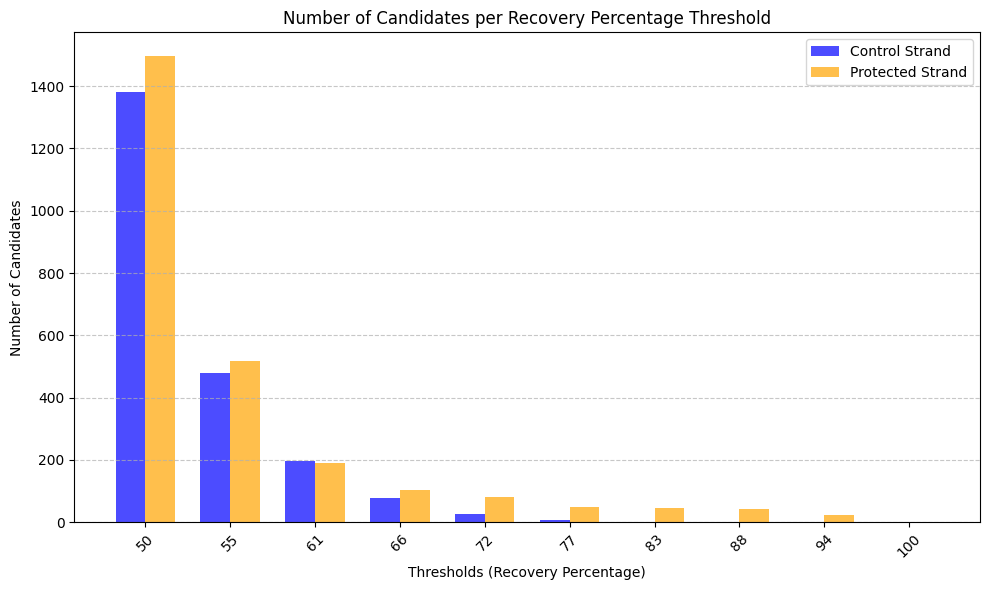

In [46]:
import numpy as np
import matplotlib.pyplot as plt

random_rec = [i * 100 for i in random_recs[1]]
protected_rec = [i * 100 for i in protected_recs[1]]

# Define bins for thresholds
bins = np.linspace(50, max(np.max(random_rec), np.max(protected_rec)), 10)  # 10 bins

# Calculate the count of candidates greater than each bin threshold
counts_control = [np.sum(random_rec > t) for t in bins]
counts_protected = [np.sum(protected_rec > t) for t in bins]

# Define bar positions and width
x = np.arange(len(bins))
bar_width = 0.35

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, counts_control, bar_width, label="Control Strand", color="blue", alpha=0.7)
plt.bar(x + bar_width / 2, counts_protected, bar_width, label="Protected Strand", color="orange", alpha=0.7)

# Label the plot
plt.xlabel("Thresholds (Recovery Percentage)")
plt.ylabel("Number of Candidates")
plt.title("Number of Candidates per Recovery Percentage Threshold")
plt.xticks(x, [f"{int(t)}" for t in bins], rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [47]:
np.mean()

[0.782608695652174,
 0.8260869565217391,
 0.7037037037037037,
 0.782608695652174,
 0.8636363636363636]

In [48]:
best_recs_protected

[1.0, 1.0, 1.0, 1.0, 1.0]

In [52]:
threshold_candidates_protected = [len([i for i in recs_pro if i > 0.75]) for recs_pro in protected_recs]
threshold_candiates_control = [len([i for i in recs_con if i > 0.75]) for recs_con in random_recs]

In [53]:
import pandas as pd


pd.DataFrame(columns=['Best Recovery Protected', 'Best Recovery Control', 'Number of Threshold Candidates Protected', 'Number of Threshold Candidates Control'], data=np.array([best_recs_protected, best_recs_control, threshold_candidates_protected, threshold_candiates_control]).T)

,Best Recovery Protected,Best Recovery Control,Number of Threshold Candidates Protected,Number of Threshold Candidates Control
0,1.0,0.782609,90.0,2.0
1,1.0,0.826087,64.0,11.0
2,1.0,0.703704,42.0,0.0
3,1.0,0.782609,104.0,6.0
4,1.0,0.863636,138.0,3.0


In [54]:
len(candidates)

26241

### Testing length of protected strand vs best recovery (fixing for one run)

In [ ]:
original_strand = original_strands[0]

In [58]:


protected_length = 20
best_recovery = 0.605
recs = []
lens = []

while best_recovery > 0.6:
    start_indice = random.randint(0, len(original_strand) - protected_length - 1)
    for candidate in tqdm(candidates):
        aligned_strand, identity, indices = align(original_strand[start_indice: start_indice + protected_length], candidate)

        if identity > best_recovery:
            if identity > 0.95:
                best_recovery = identity
                break
            best_recovery = identity
    
    if best_recovery == 0.605:
        print(f"Largest length = {protected_length}")

    
    print(f"Best recover for {protected_length} is {best_recovery}")
    recs.append(best_recovery)
    lens.append(protected_length)

    best_recovery = 0.605
    protected_length += 10

  0%|          | 0/26241 [00:00<?, ?it/s]

Best recover for 20 is 1.0


  0%|          | 0/26241 [00:00<?, ?it/s]

Best recover for 30 is 0.9666666666666667


  0%|          | 0/26241 [00:00<?, ?it/s]

Best recover for 40 is 0.925


  0%|          | 0/26241 [00:00<?, ?it/s]

Best recover for 50 is 0.92


  0%|          | 0/26241 [00:00<?, ?it/s]

Best recover for 60 is 0.9


  0%|          | 0/26241 [00:00<?, ?it/s]

Best recover for 70 is 0.9


  0%|          | 0/26241 [00:00<?, ?it/s]

Best recover for 80 is 0.9506172839506173


  0%|          | 0/26241 [00:00<?, ?it/s]

Best recover for 90 is 0.8666666666666667


  0%|          | 0/26241 [00:00<?, ?it/s]

Best recover for 100 is 0.8627450980392157


  0%|          | 0/26241 [00:00<?, ?it/s]

Best recover for 110 is 0.8545454545454545


  0%|          | 0/26241 [00:00<?, ?it/s]

Best recover for 120 is 0.8916666666666667


  0%|          | 0/26241 [00:00<?, ?it/s]

Best recover for 130 is 0.8625954198473282


  0%|          | 0/26241 [00:00<?, ?it/s]

Best recover for 140 is 0.8642857142857143


  0%|          | 0/26241 [00:00<?, ?it/s]

Best recover for 150 is 0.869281045751634


  0%|          | 0/26241 [00:00<?, ?it/s]

Best recover for 160 is 0.85625


  0%|          | 0/26241 [00:00<?, ?it/s]

Best recover for 170 is 0.847953216374269


  0%|          | 0/26241 [00:00<?, ?it/s]

Best recover for 180 is 0.85


  0%|          | 0/26241 [00:00<?, ?it/s]

Best recover for 190 is 0.8578947368421053


ValueError: empty range in randrange(0, 0)

In [67]:
protected_length = 20
best_recovery = 0.605

recs_p = []
threshold_candidates_p = []

recs_control = []
threshold_candidates_control = []

lens = []


while best_recovery > 0.6 and protected_length < 200:

    start_indice = random.randint(0, len(original_strand) - protected_length - 1)
    control_flag, protected_flag = True, True
    random_strand = create_random_strand(strand_length=protected_length)
    threshold_p, threshold_c = 0, 0
    for candidate in tqdm(candidates):
        
        if protected_flag:
            aligned_strand, identity, indices = align(original_strand[start_indice: start_indice + protected_length], candidate)

            if identity > best_recovery_protected:
                best_recovery_protected = identity

            if identity > 0.7:
                threshold_p +=1

        if control_flag:
            aligned_strand, identity, indices = align(random_strand, candidate)

            if identity > best_recovery_control:
                best_recovery_control = identity
            
            if identity > 0.7:
                threshold_c +=1
    
    print(f"Best recovery for protected {protected_length} is {best_recovery_protected}")
    print(f"Threshold candidates protected {threshold_p}")
    print(f"Best recovery for control {protected_length} is {best_recovery_control}")
    print(f"Threshold candidates control {threshold_c}")
    print()

    recs_p.append(best_recovery_protected)
    recs_control.append(best_recovery_control)
    lens.append(protected_length)

    threshold_candidates_p.append(threshold_p)
    threshold_candidates_control.append(threshold_c)

    best_recovery_protected = 0.605
    best_recovery_control = 0.605
    protected_length += 10

  0%|          | 0/26241 [00:00<?, ?it/s]

Best recovery for protected 20 is 1.0
Threshold candidates protected 77
Best recovery for control 20 is 0.8571428571428571
Threshold candidates control 9



  0%|          | 0/26241 [00:00<?, ?it/s]

Best recovery for protected 30 is 0.9666666666666667
Threshold candidates protected 53
Best recovery for control 30 is 0.6511627906976745
Threshold candidates control 0



  0%|          | 0/26241 [00:00<?, ?it/s]

Best recovery for protected 40 is 0.925
Threshold candidates protected 70
Best recovery for control 40 is 0.605
Threshold candidates control 0



  0%|          | 0/26241 [00:00<?, ?it/s]

Best recovery for protected 50 is 0.9038461538461539
Threshold candidates protected 60
Best recovery for control 50 is 0.605
Threshold candidates control 0



  0%|          | 0/26241 [00:00<?, ?it/s]

Best recovery for protected 60 is 0.9016393442622951
Threshold candidates protected 71
Best recovery for control 60 is 0.605
Threshold candidates control 0



  0%|          | 0/26241 [00:00<?, ?it/s]

Best recovery for protected 70 is 0.8857142857142857
Threshold candidates protected 78
Best recovery for control 70 is 0.605
Threshold candidates control 0



  0%|          | 0/26241 [00:00<?, ?it/s]

KeyboardInterrupt: 

(0.0, 1.1)

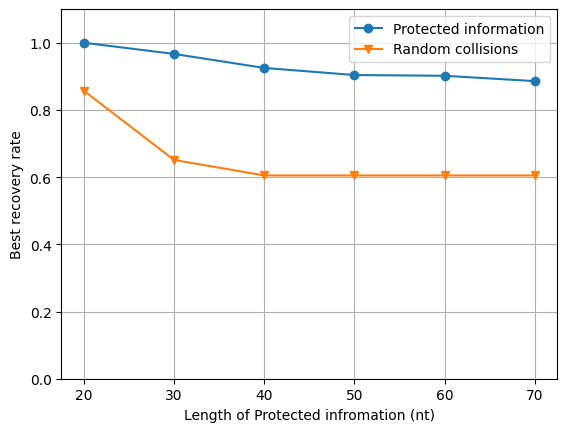

In [92]:
plt.plot(lens, recs_p, marker='o',label="Protected information")
plt.plot(lens, recs_control, marker='v', label="Random collisions")
plt.xlabel("Length of Protected infromation (nt)")
plt.ylabel("Best recovery rate")
plt.legend()
plt.grid()
plt.ylim(0, 1.1)
